Document for Model training



Importing packages

In [9]:
import matplotlib.pyplot as plt
from synDataFunctionality.TreeLib import Tree, genTree
import numpy as np
from synDataFunctionality.genInputFromLabel import labelToInput


Setting Constants

In [10]:
startX = 5
startY = 360
startAngle = 0
starWidth = 15
stopWidth = 3
startLength = 20
bifurcProb = 0.3


Make some trees 

In [12]:
from synDataFunctionality.saveSynData import genSynDat
import torch.utils.data as td
from DataLoaders import SynData

Make and save some synthetic data

In [13]:
lst = [startX, startY, starWidth, startLength, startAngle, stopWidth]
num = 9

# make num samples
genSynDat("SynDat/SynInput", "SynDat/SynLabel", lst, (736, 736), num)


Test that we can make a dataSet and it outputs data as expected

In [14]:
SynDataSet = SynData("SynDat/synInput", "SynDat/synLabel")

#Test we can retrieve data from Dataset
test, lab = SynDataSet[0]
print(test.shape)
print(lab.shape)

torch.Size([1, 736, 736])
torch.Size([1, 736, 736])


Visualize synthetic generated data

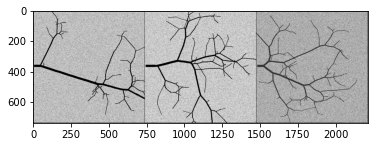

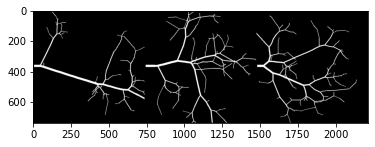

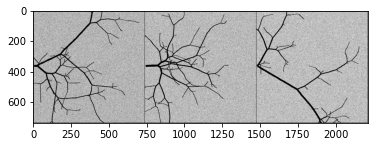

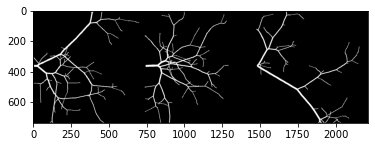

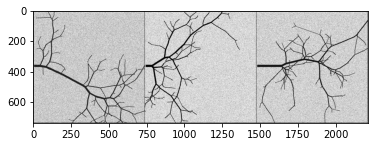

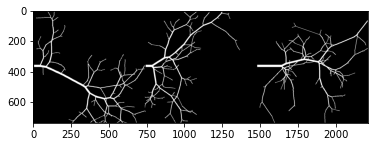

In [15]:
import torchvision

#test that dataloader works, and show images
test_loader = td.DataLoader(SynDataSet, batch_size=3)

testIter = iter(test_loader)
for i in range(len(testIter)):
    imgs, labs = testIter.next()
    grid = torchvision.utils.make_grid(imgs) #.numpy()[0] hack to show tensor in plt
    plt.imshow(grid.numpy()[0], cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs)
    plt.imshow(lab_grid.numpy()[0], cmap="gray", vmin=0, vmax=1)
    plt.show()

Check that transformations can be applied to dataSet

In [16]:
#Test transformations work correctly on dataloader:
from torchvision.transforms import RandomVerticalFlip, RandomHorizontalFlip, ColorJitter, CenterCrop, Normalize
from torchvision.transforms.functional import rotate
import torchvision

t_both = [RandomHorizontalFlip(p=0.5),  RandomVerticalFlip(p=0.5)]
#Maybe normalize imgs automatically in dataSet

In [17]:
TransDataSet = SynData("SynDat/synInput", "SynDat/synLabel", transforms_both=t_both)#, transforms_train=t_dat)


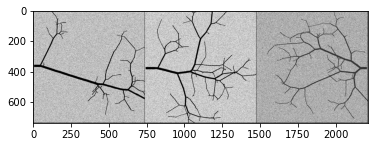

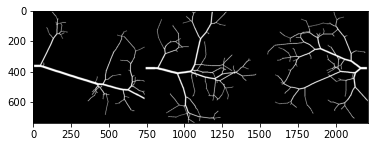

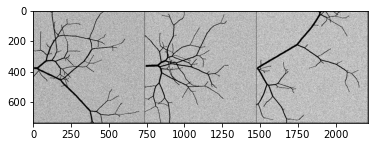

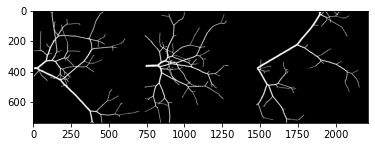

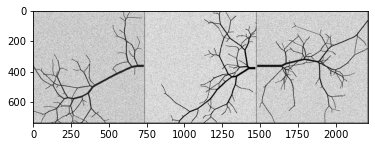

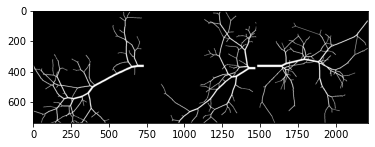

In [18]:
import torchvision
import numpy as np

#test that dataloader works, and show images
trans_loader = td.DataLoader(TransDataSet, batch_size=3)

transIter = iter(trans_loader)
for i in range(len(transIter)):
    imgs, labs = transIter.next()
    grid = torchvision.utils.make_grid(imgs).numpy()[0]
    #print(np.amax(np.array(imgs)))
    #print(np.amin(np.array(imgs)))
    plt.imshow(grid+1, cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs).numpy()[0]
    plt.imshow(lab_grid, cmap="gray", vmin=0, vmax=1)
    plt.show()

Kill all files created in this session, such to diminish clutter

In [19]:
#kill generated files such that we diminish clutter
from synDataFunctionality.saveSynData import order_66

order_66("SynDat/synInput", "SynDat/synLabel")
